# Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data file

In [3]:
loan_data = pd.read_csv('loan.csv',low_memory = False, header=0)
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
#supress scientific notation of values
pd.options.display.float_format = '{:.2f}'.format
#increasing max number of columns and rows  displayed with pandas.
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 100)

# Data Cleaning

## Identify the columns with maximum number of null values and drop such columns

In [5]:
#percentage of null or missing values
null_perc = round(100*(loan_data.isnull().sum()/len(loan_data.index)), 2)
#columns which have more than 0% missing values
null_perc[ null_perc > 0 ]

emp_title                          6.19
emp_length                         2.71
desc                              32.59
title                              0.03
mths_since_last_delinq            64.66
mths_since_last_record            92.99
revol_util                         0.13
last_pymnt_d                       0.18
next_pymnt_d                      97.13
last_credit_pull_d                 0.01
collections_12_mths_ex_med         0.14
mths_since_last_major_derog      100.00
annual_inc_joint                 100.00
dti_joint                        100.00
verification_status_joint        100.00
tot_coll_amt                     100.00
tot_cur_bal                      100.00
open_acc_6m                      100.00
open_il_6m                       100.00
open_il_12m                      100.00
open_il_24m                      100.00
mths_since_rcnt_il               100.00
total_bal_il                     100.00
il_util                          100.00
open_rv_12m                      100.00


In [6]:
loan_data.shape

(39717, 111)

In [7]:
#columns having more than 30% null values in it are of no use and hence drop them
loan_data.drop(null_perc[ null_perc > 30 ].index, axis=1, inplace=True)

In [8]:
loan_data.shape

(39717, 53)

### Identify and drop columns with unique value

In [10]:
#Finding number of unique values in each vcolumn
loan_data.nunique().sort_values().head(15)

tax_liens                     1
delinq_amnt                   1
chargeoff_within_12_mths      1
acc_now_delinq                1
application_type              1
policy_code                   1
collections_12_mths_ex_med    1
initial_list_status           1
pymnt_plan                    1
term                          2
pub_rec_bankruptcies          3
verification_status           3
loan_status                   3
pub_rec                       5
home_ownership                5
dtype: int64

In [11]:
#remove columns which have only one unique value as the data would not provide any insigghts
loan_data.drop(['tax_liens', 'delinq_amnt', 'chargeoff_within_12_mths', 'acc_now_delinq', 'application_type', 'policy_code', 'collections_12_mths_ex_med', 'initial_list_status', 'pymnt_plan'], axis=1, inplace=True)

In [12]:
loan_data.shape

(39717, 44)

### Identify and drop columns with distinct values and keep only one such column for the purpose  of primary key

In [14]:
#Find high number of unique values
loan_data.nunique().sort_values(ascending=False).head(15)

id                 39717
url                39717
member_id          39717
total_pymnt        37850
total_pymnt_inv    37518
total_rec_int      35148
last_pymnt_amnt    34930
emp_title          28820
revol_bal          21711
title              19615
installment        15383
funded_amnt_inv     8205
total_rec_prncp     7976
annual_inc          5318
recoveries          4040
dtype: int64

In [15]:
#id, url, and member_id have unique values which means any one of these can be used as primary key.
loan_data.drop(['member_id', 'url'], axis=1, inplace=True)

# Data preparation for analysis

In [16]:
# Convert 'int_rate' to a numeric value
loan_data['int_rate'] = loan_data.int_rate.str.rstrip('%').astype('float')
# Convert 'revol_util' to a numeric value
loan_data['revol_util'] = loan_data.revol_util.str.strip('%').astype('float')

In [17]:
loan_data.dtypes

id                           int64
loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                        object
int_rate                   float64
installment                float64
grade                       object
sub_grade                   object
emp_title                   object
emp_length                  object
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
purpose                     object
title                       object
zip_code                    object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
open_acc                     int64
pub_rec                      int64
revol_bal                    int64
revol_util                 float64
total_acc           

# date type conversation:

In [18]:
# Ensure issue_d is in datetime format

loan_data['issue_d'] = pd.to_datetime(loan_data['issue_d'], format='%b-%y', errors='coerce')

# Splitting issue_d into year, month, and day
loan_data['issue_year'] = loan_data['issue_d'].dt.year
loan_data['issue_month'] = loan_data['issue_d'].dt.month
loan_data['issue_day'] = loan_data['issue_d'].dt.day

In [19]:
# Ensure earliest_cr_line is in datetime format

loan_data['earliest_cr_line'] = pd.to_datetime(loan_data['earliest_cr_line'], format='%b-%y', errors='coerce')

# Splitting earliest_cr_line into year, month, and day
loan_data['earliest_cr_line_year'] = loan_data['earliest_cr_line'].dt.year
loan_data['earliest_cr_line_month'] = loan_data['earliest_cr_line'].dt.month
loan_data['earliest_cr_line_day'] = loan_data['earliest_cr_line'].dt.day

# Other data corrections:

- Loan Status Column has 3 distict values. We need only Fully Paid and Charged Off. So, we will remove the rows with Current values in loan status
- the columns - "out_prncp", "out_prncp_inv", "last_pymnt_d'", "last_pymnt_amnt, "last_credit_pull_d" are only applicable for current loan and hence removing

In [20]:
loan_data = loan_data[loan_data.loan_status != 'Current']
loan_data.drop(["out_prncp", "out_prncp_inv", "last_pymnt_d", "last_pymnt_amnt", "last_credit_pull_d"], axis=1, inplace=True)

- The columns "total_rec_late_fee", "recoveries", "collection_recovery_fee" are giving information about post default scenario 
- hence not needed for our analysis

In [21]:
loan_data.drop(["total_rec_late_fee", "recoveries", "collection_recovery_fee"], axis=1, inplace=True)

# Univariate Analysis
## Descriptive Statistics: 
- For numerical variables (e.g., loan_amnt, annual_inc, int_rate, dti), Compute measures like mean, median, mode, standard deviation, variance, range, quartiles, and percentiles.
- These statistics provide insights into the central tendency, spread, and general distribution of the data.

In [22]:
loan_data.loan_amnt.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count   38577.00
mean    11047.03
std      7348.44
min       500.00
5%       2400.00
10%      3090.00
25%      5300.00
50%      9600.00
75%     15000.00
90%     21600.00
95%     25000.00
99%     35000.00
max     35000.00
Name: loan_amnt, dtype: float64

### Insight:
- minimum loan amount is 500 and max is 35000. 
- Average loan amount is 11047
- Nearly 75 percentile of the applicant opted for loan below 15000 and hence max loan applications are between 500 and 15000

In [23]:
loan_data.funded_amnt.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count   38577.00
mean    10784.06
std      7090.31
min       500.00
5%       2400.00
10%      3000.00
25%      5200.00
50%      9550.00
75%     15000.00
90%     20000.00
95%     25000.00
99%     35000.00
max     35000.00
Name: funded_amnt, dtype: float64

### Insights:
- The figures are very similar to loan amount. This means LendingClub approved nearly all the loans

In [24]:
loan_data.funded_amnt_inv.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count   38577.00
mean    10222.48
std      7022.72
min         0.00
5%       1800.00
10%      2825.00
25%      5000.00
50%      8733.44
75%     14000.00
90%     19975.00
95%     24500.07
99%     34715.01
max     35000.00
Name: funded_amnt_inv, dtype: float64

In [25]:
loan_data[loan_data['funded_amnt_inv']<=500]

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,pub_rec_bankruptcies,issue_year,issue_month,issue_day,earliest_cr_line_year,earliest_cr_line_month,earliest_cr_line_day
17818,709526,12000,12000,400.00,36 months,7.66,374.16,A,A5,NaN,NaN,OWN,30000.00,Not Verified,2011-03-01,Fully Paid,car,Car Loan,290xx,SC,3.04,0,1989-06-01,1,5,0,4174,21.40,22,12076.61,402.56,12000.00,76.61,0.00,2011,3,1,1989,6,1
22202,632676,1000,1000,500.00,36 months,6.54,30.67,A,A4,AG industries,10+ years,MORTGAGE,70000.00,Verified,2010-12-01,Fully Paid,vacation,my vacation,280xx,NC,12.82,0,1996-06-01,0,4,0,1893,49.80,14,1104.06,552.03,1000.00,104.06,0.00,2010,12,1,1996,6,1
22593,626701,1000,1000,500.00,36 months,9.99,32.27,B,B4,IBM,4 years,MORTGAGE,85000.00,Source Verified,2010-12-01,Fully Paid,major_purchase,Joe's birthday,727xx,AR,2.84,0,1994-10-01,1,7,0,0,0.00,18,1032.10,516.05,1000.00,32.10,0.00,2010,12,1,1994,10,1
36815,395081,10000,7500,500.00,36 months,12.84,252.14,C,C2,SULLIVAN ARC,< 1 year,RENT,35004.00,Source Verified,2009-05-01,Fully Paid,debt_consolidation,Debt Consolidation,127xx,NY,21.36,0,1999-12-01,0,10,0,10638,61.80,26,9430.86,628.72,7500.00,1930.86,0.00,2009,5,1,1999,12,1
37808,371976,1000,1000,209.20,36 months,14.74,34.54,D,D3,NaN,< 1 year,RENT,10000.00,Not Verified,2009-01-01,Fully Paid,small_business,Get back on feet,021xx,MA,1.20,1,2003-12-01,0,3,0,437,9.70,6,1243.29,224.45,1000.00,243.29,0.00,2009,1,1,2003,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39700,98276,5400,5400,200.00,36 months,7.75,168.60,A,A3,NaN,< 1 year,RENT,8000.00,Not Verified,2007-07-01,Fully Paid,educational,Help with college expenses,306xx,GA,3.00,0,1989-03-01,0,4,0,1321,16.50,4,6069.34,224.80,5400.00,669.34,NaN,2007,7,1,1989,3,1
39705,93061,5000,5000,250.00,36 months,7.43,155.38,A,A2,MetraTech,8 years,MORTGAGE,120000.00,Not Verified,2007-07-01,Fully Paid,debt_consolidation,My Loan,017xx,MA,2.29,0,1997-10-01,0,8,0,8379,16.90,16,5593.63,279.69,5000.00,593.63,NaN,2007,7,1,1997,10,1
39706,92676,5000,5000,150.00,36 months,8.07,156.84,A,A4,NaN,< 1 year,MORTGAGE,180000.00,Not Verified,2007-07-01,Fully Paid,home_improvement,remodelin my kitchen,530xx,WI,5.55,0,1996-06-01,0,12,0,40934,26.30,39,5645.96,169.38,5000.00,645.96,NaN,2007,7,1,1996,6,1
39708,92552,5000,5000,375.00,36 months,9.96,161.25,B,B5,Millenium Group,4 years,MORTGAGE,48000.00,Not Verified,2007-07-01,Fully Paid,debt_consolidation,Tito5000,333xx,FL,8.03,0,1995-08-01,1,6,0,28329,48.60,6,5804.73,435.36,5000.00,804.73,NaN,2007,7,1,1995,8,1


### Insights:
- Aprox 300 loan applications were either not funded by investors or funded substantially lower compared to the loan requested

In [26]:
loan_data.int_rate.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count   38577.00
mean       11.93
std         3.69
min         5.42
5%          6.17
10%         7.14
25%         8.94
50%        11.71
75%        14.38
90%        16.82
95%        18.31
99%        20.99
max        24.40
Name: int_rate, dtype: float64

### Insights:
- Average interest rate is 11.93%
- Some borrowers have taken loan at hiher interest rates of 24.4%
- For maximum loan applications (75 percentile), the average interest is 14.3%

In [27]:
loan_data.annual_inc.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count     38577.00
mean      68777.97
std       64218.68
min        4000.00
5%        24000.00
10%       30000.00
25%       40000.00
50%       58868.00
75%       82000.00
90%      115000.00
95%      140004.00
99%      234144.00
max     6000000.00
Name: annual_inc, dtype: float64

### Insights:
- Average income of LendingClub borrowers is 68K
- Only 1% of borrowers have income above 230K
- Maximum borrowers (75 percentile) have income below 82K

In [28]:
loan_data.dti.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count   38577.00
mean       13.27
std         6.67
min         0.00
5%          2.10
10%         4.06
25%         8.13
50%        13.37
75%        18.56
90%        22.29
95%        23.80
99%        26.53
max        29.99
Name: dti, dtype: float64

### DTI: 
- The Debt-to-Income (DTI) ratio is a personal finance measure that compares an individual's monthly debt payment to their monthly gross income. It's a key indicator used by lenders to assess a borrower's ability to manage monthly payments and repay debts.
### Insights:
- The DTI seems to be well wihin the range. No outliers found in the data

In [29]:
loan_data.shape

(38577, 40)

# Segmented Univariate Analysis
## Distribution Statistics: 
- Histograms or density plots for continuous numerical variables to understand their distribution.
- For categorical variables (e.g., grade, home_ownership, purpose), bar charts can be used to show the frequency distribution.

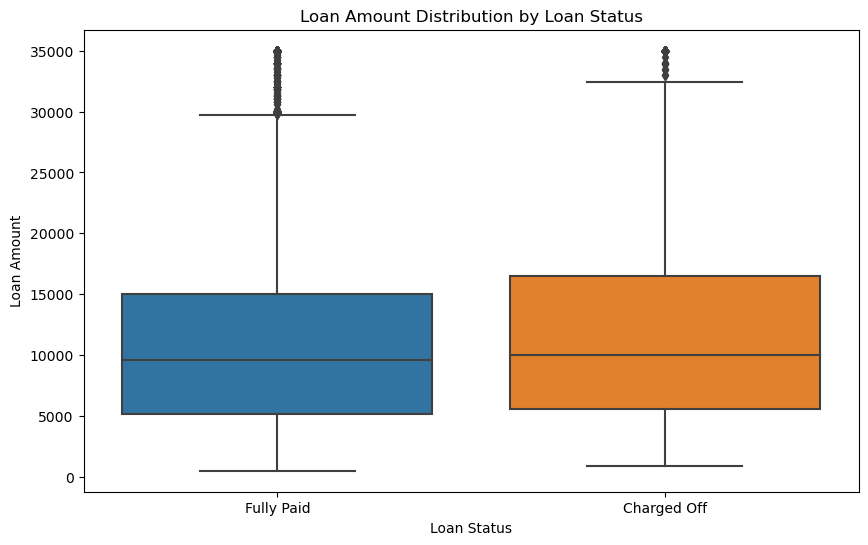

In [30]:
# Segmented Univariate Analysis: Loan Amount by Loan Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='loan_amnt', data=loan_data)
plt.title('Loan Amount Distribution by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.show()

### Insights
- There is a tendancy to default when loan amount is higher as it is evident from the box plot

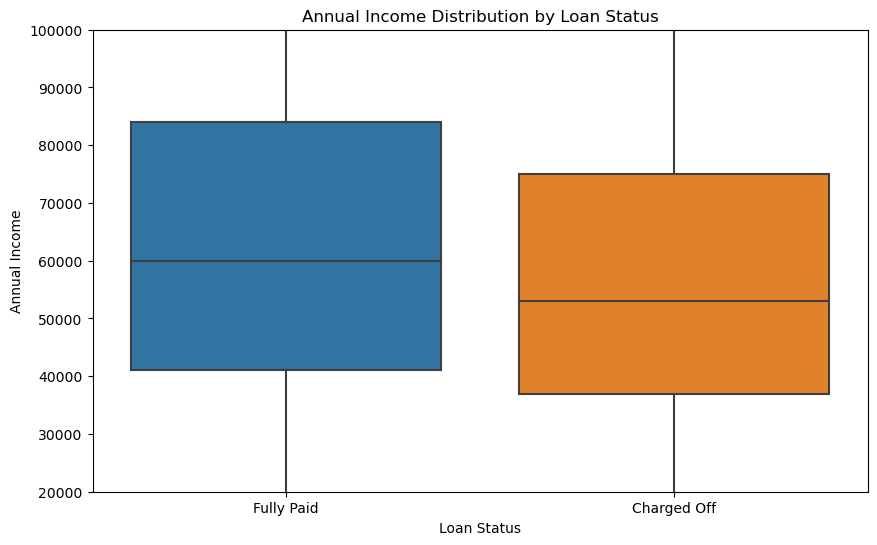

In [32]:
# Segmented Univariate Analysis: Annual Income by Loan Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='annual_inc', data=loan_data)
plt.title('Annual Income Distribution by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Annual Income')
plt.ylim([20000, 100000])
plt.show()

### Insights:
- Lower income levels have higher tendancy to default

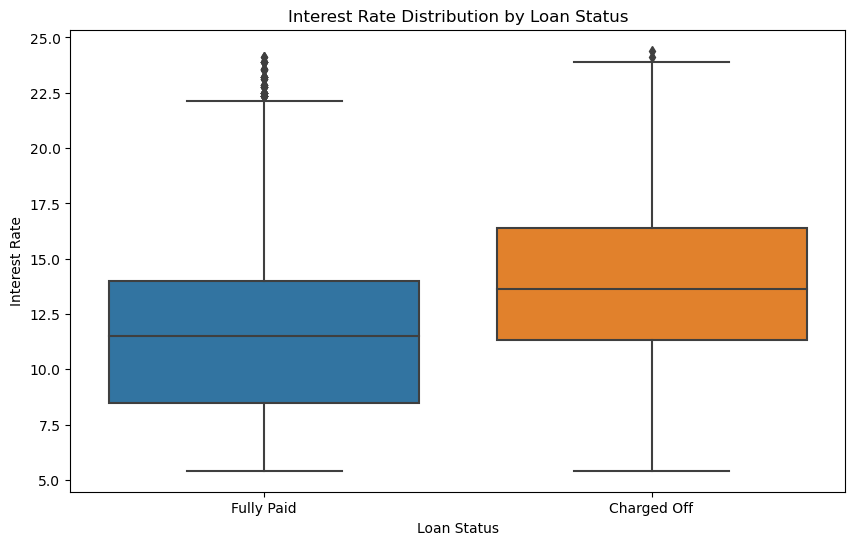

In [33]:
# Segmented Univariate Analysis: Interest Rate by Loan Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='int_rate', data=loan_data)
plt.title('Interest Rate Distribution by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Interest Rate')
plt.show()

### Insights:
- There is a higher tendancy to default when Interest rates are higher as box plot suggest

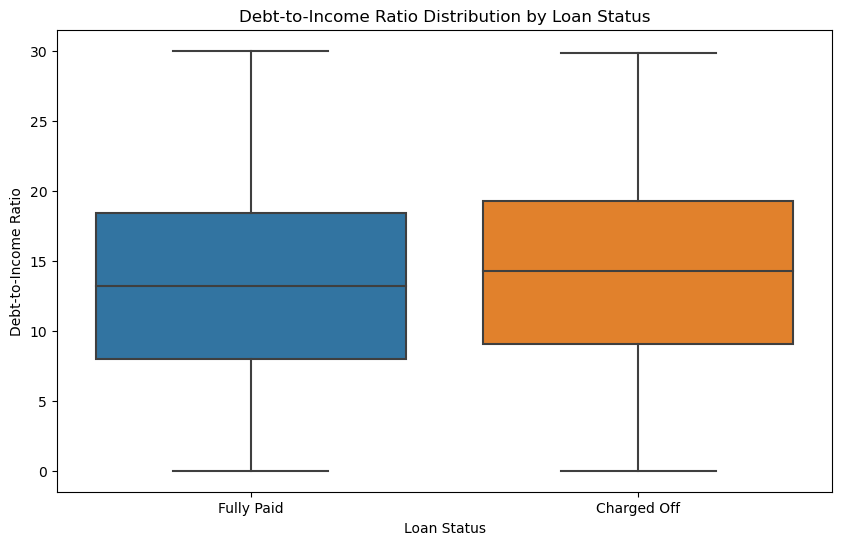

In [34]:
# Segmented Univariate Analysis: Debt-to-Income Ratio by Loan Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='dti', data=loan_data)
plt.title('Debt-to-Income Ratio Distribution by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Debt-to-Income Ratio')
plt.show()

### Insights:
- Debt-to-Income Ratio does not provide any indication of defauly

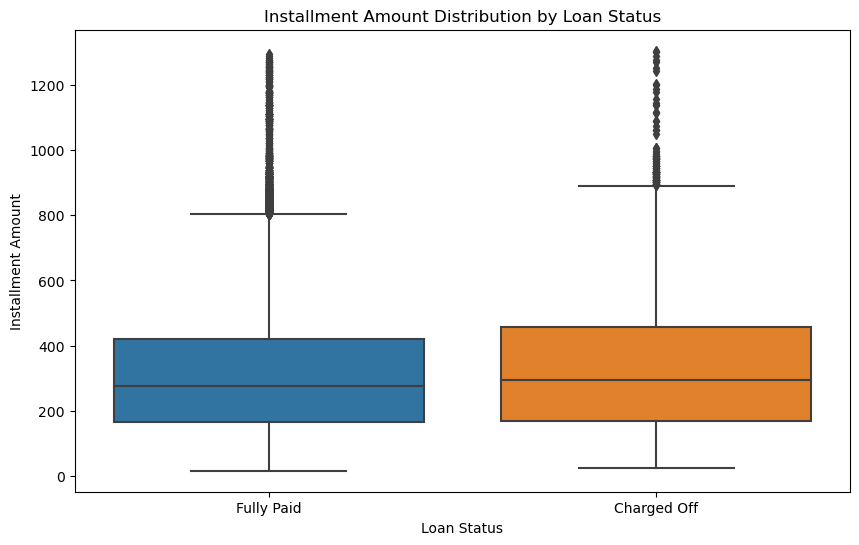

In [35]:
# Segmented Univariate Analysis: Installment Amount by Loan Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='installment', data=loan_data)
plt.title('Installment Amount Distribution by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Installment Amount')
plt.show()

### Insights:
- Installment does not provide any indication of defauly

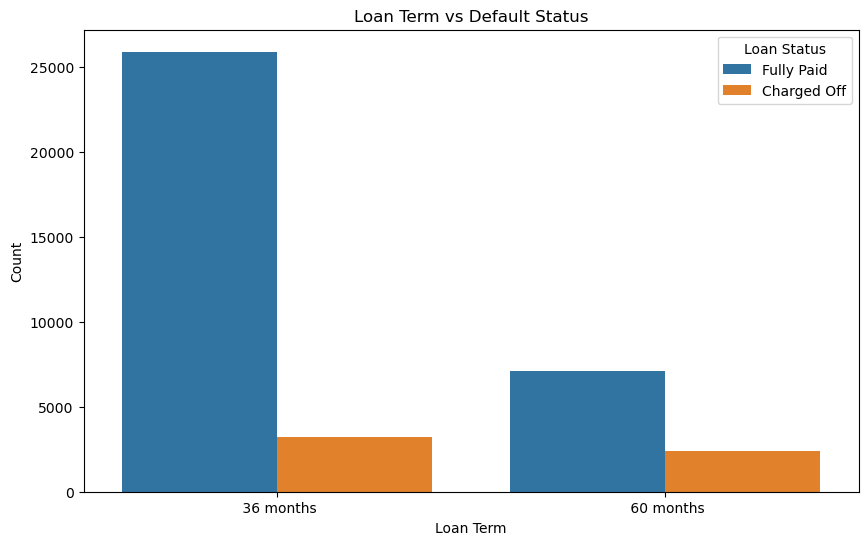

In [37]:
# Segmented Univariate Analysis: Loan Term by Loan Status
plt.figure(figsize=(10, 6))
sns.countplot(x='term', hue='loan_status', data=loan_data, order=sorted(loan_data['term'].unique()))
plt.title('Loan Term vs Default Status')
plt.xlabel('Loan Term')
plt.ylabel('Count')
#plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.legend(title='Loan Status')
plt.show()

### Insights:
- LC has issued more loans with short duration
- High % of default in higher term loans

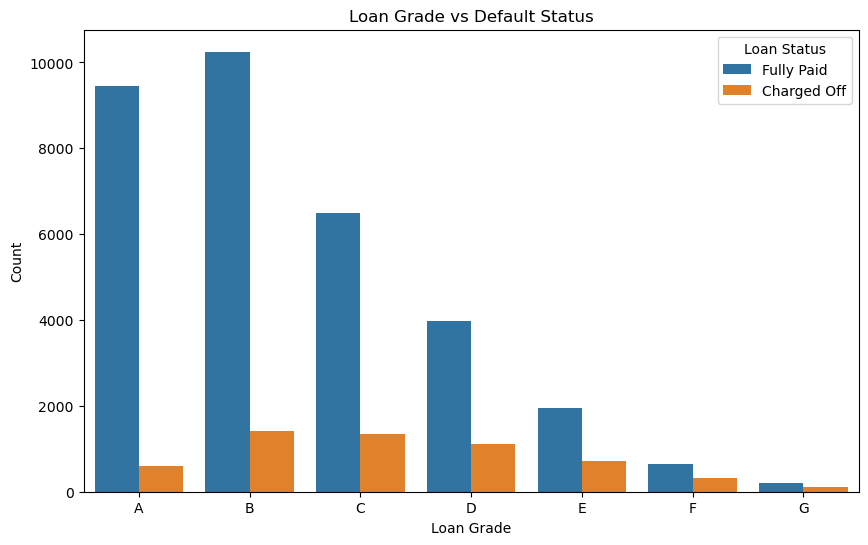

In [38]:
# Segmented Univariate Analysis: Loan Grade by Loan Status
plt.figure(figsize=(10, 6))
sns.countplot(x='grade', hue='loan_status', data=loan_data, order=sorted(loan_data['grade'].unique()))
plt.title('Loan Grade vs Default Status')
plt.xlabel('Loan Grade')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

### Insights:
- There is a higher frequency of default in loan grade D, E, F & G

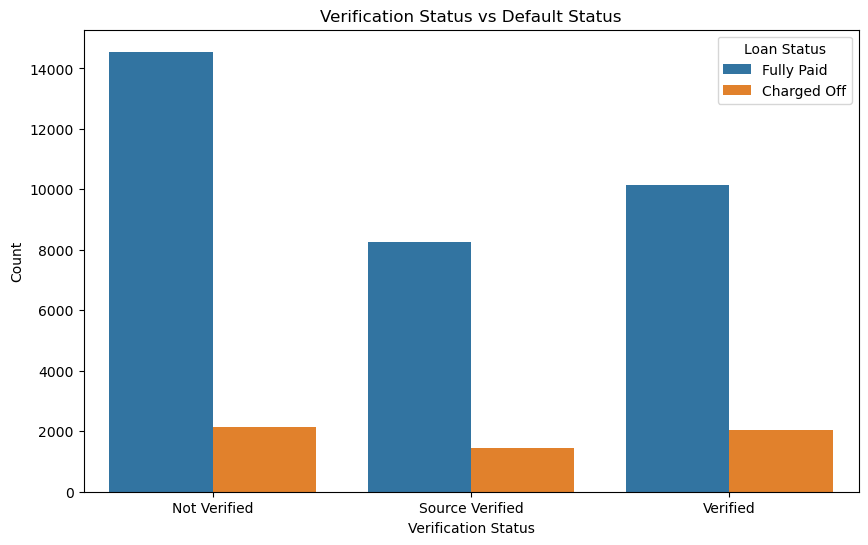

In [39]:
# Segmented Univariate Analysis: Verification Status by Loan Status
plt.figure(figsize=(10, 6))
sns.countplot(x='verification_status', hue='loan_status', data=loan_data, order=sorted(loan_data['verification_status'].unique()))
plt.title('Verification Status vs Default Status')
plt.xlabel('Verification Status')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

### Insights:
- There is a higher frequency of default in verified category. 
- Seems LendingClub needs to strengthen their verification process

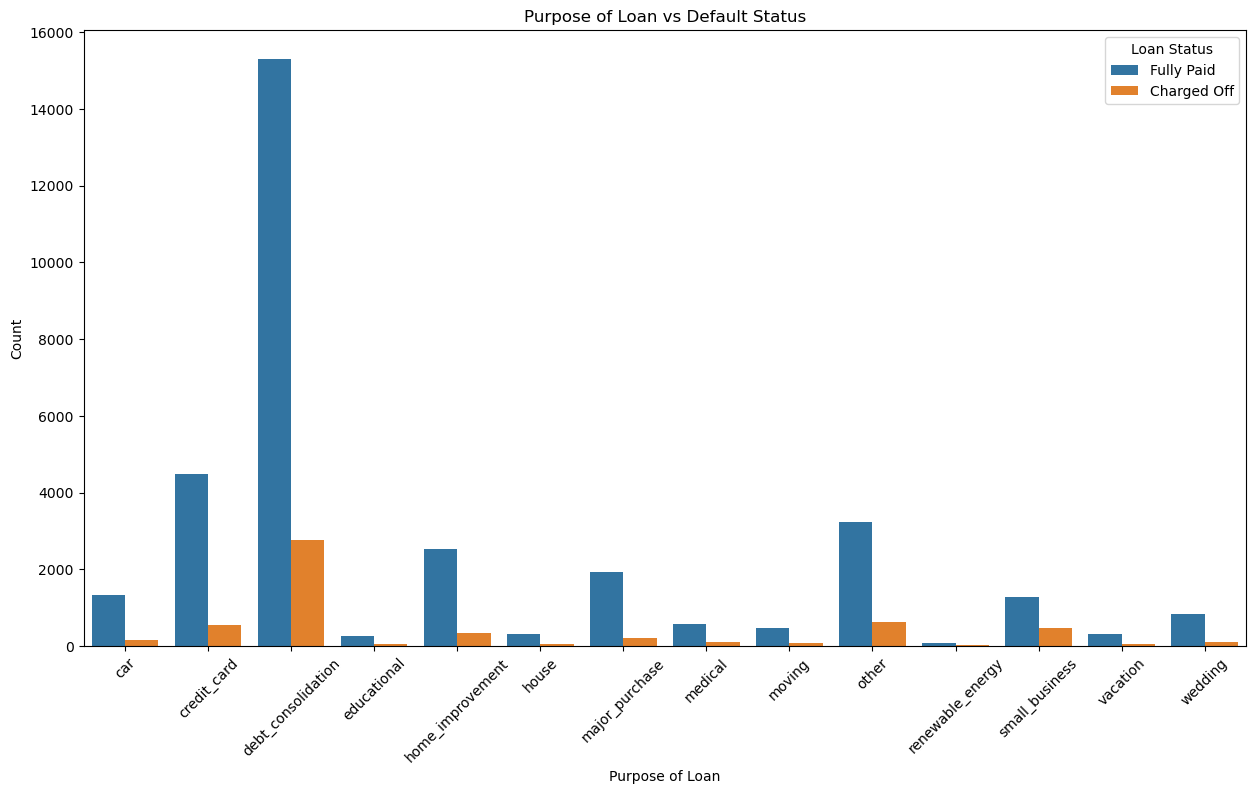

In [40]:
# Segmented Univariate Analysis: Purpose of loan by Loan Status
plt.figure(figsize=(15, 8))
sns.countplot(x='purpose', hue='loan_status', data=loan_data, order=sorted(loan_data['purpose'].unique()))
plt.title('Purpose of Loan vs Default Status')
plt.xlabel('Purpose of Loan')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.legend(title='Loan Status')
plt.show()

### Insights:
- Although there is a high demand for loan for debt consolidation, the category has also highest no of defaults
- LC should investigate such categories more diligently

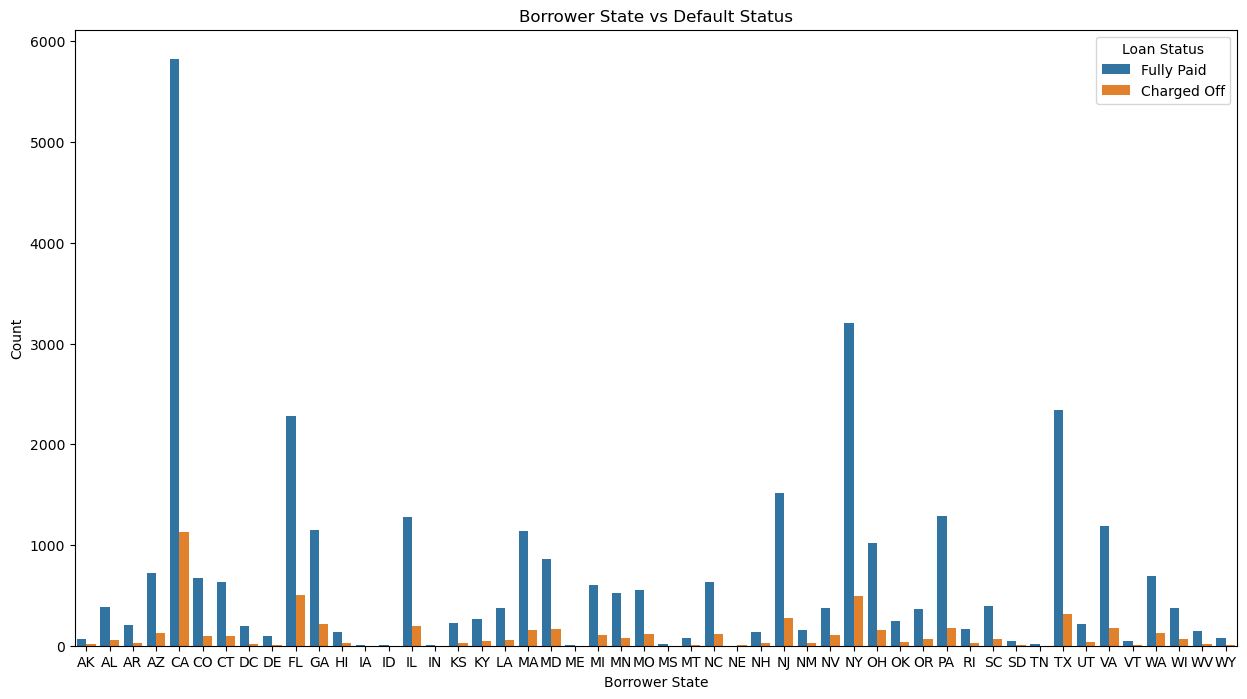

In [41]:
# Segmented Univariate Analysis: Borrower State by Loan Status
plt.figure(figsize=(15, 8))
sns.countplot(x='addr_state', hue='loan_status', data=loan_data, order=sorted(loan_data['addr_state'].unique()))
plt.title('Borrower State vs Default Status')
plt.xlabel('Borrower State')
plt.ylabel('Count')
#plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.legend(title='Loan Status')
plt.show()

### Insights:
- Higher defaults in states - CS, FL, NY
- LC should investigate cases from these states more diligently

### LC Portfolio Analysis

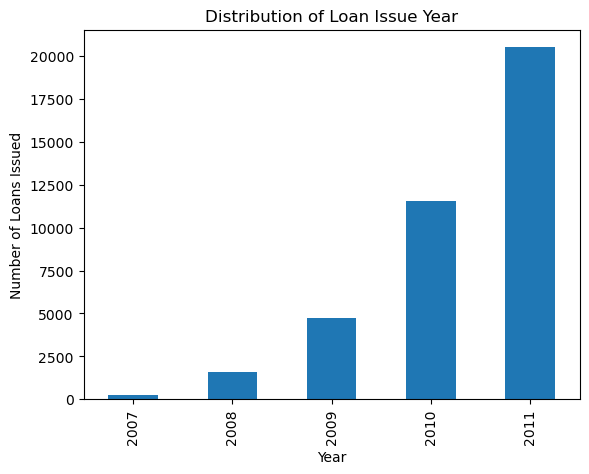

In [42]:
loan_data['issue_year'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Loan Issue Year')
plt.xlabel('Year')
plt.ylabel('Number of Loans Issued')
plt.show()

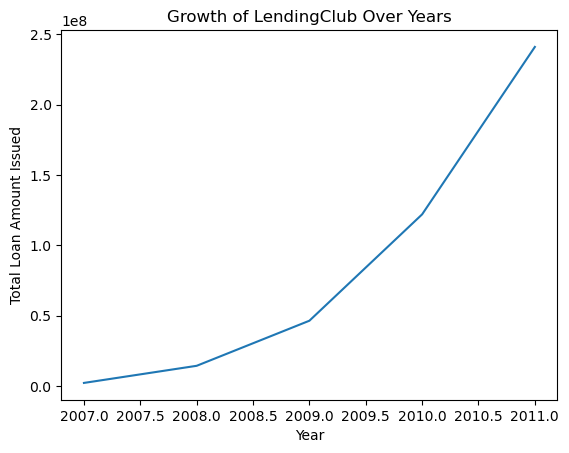

In [43]:
loan_data.groupby('issue_year')['loan_amnt'].sum().plot(kind='line')
plt.title('Growth of LendingClub Over Years')
plt.xlabel('Year')
plt.ylabel('Total Loan Amount Issued')
plt.show()

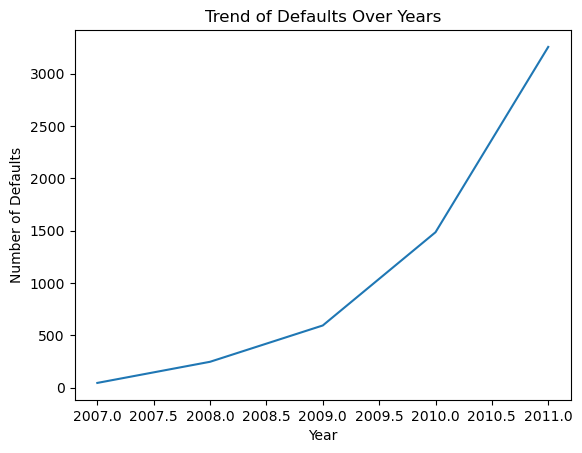

In [44]:
defaults_over_years = loan_data[loan_data['loan_status'] == 'Charged Off'].groupby('issue_year').size()
defaults_over_years.plot(kind='line')
plt.title('Trend of Defaults Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Defaults')
plt.show()

In [49]:
#Stripping empty space in values in term
loan_data['term'] = loan_data.term.str.strip()
loan_data.term.unique()

array(['36 months', '60 months'], dtype=object)

In [50]:
# Filter for 60-month loans
loan_data_60m = loan_data[loan_data['term'] == '60 months']

# Create a new column for defaulted status (adjust according to how your dataset defines default)
loan_data_60m['defaulted'] = loan_data_60m['loan_status'].apply(lambda x: 'Defaulted' if x == 'Charged Off' else 'Not Defaulted')


C:\Users\Amarjit\AppData\Local\Temp\ipykernel_16920\3336075148.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_60m['defaulted'] = loan_data_60m['loan_status'].apply(lambda x: 'Defaulted' if x == 'Charged Off' else 'Not Defaulted')


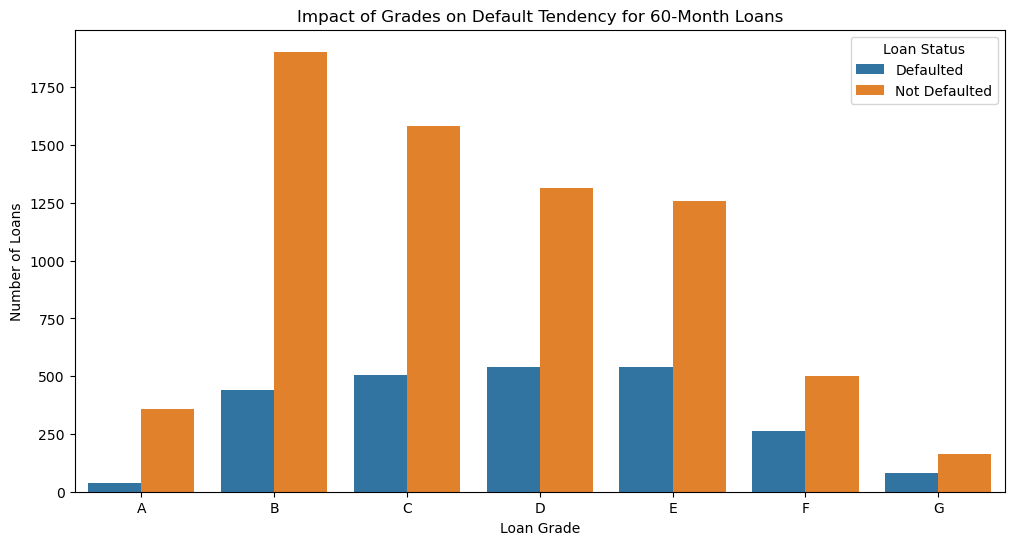

In [54]:
# Grouped bar chart
plt.figure(figsize=(12, 6))
sns.countplot(x='grade', hue='defaulted', data=loan_data_60m, order=sorted(loan_data_60m['grade'].unique()))
plt.title('Impact of Grades on Default Tendency for 60-Month Loans')
plt.xlabel('Loan Grade')
plt.ylabel('Number of Loans')
plt.legend(title='Loan Status')
plt.show()

In [55]:
# Create a new column for defaulted status (adjust according to how your dataset defines default)
loan_data['defaulted'] = loan_data['loan_status'].apply(lambda x: 'Defaulted' if x == 'Charged Off' else 'Not Defaulted')



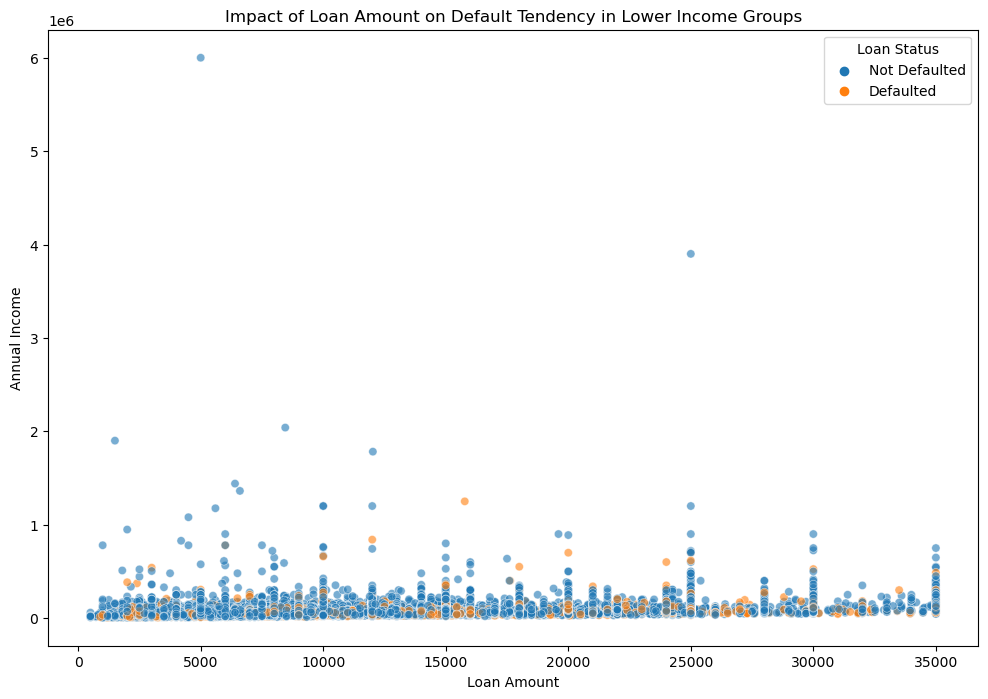

In [56]:
# Scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='loan_amnt', y='annual_inc', hue='defaulted', data=loan_data, alpha=0.6)
plt.title('Impact of Loan Amount on Default Tendency in Lower Income Groups')
plt.xlabel('Loan Amount')
plt.ylabel('Annual Income')
plt.legend(title='Loan Status')
plt.show()

In [58]:
loan_data.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,pub_rec_bankruptcies,issue_year,issue_month,issue_day,earliest_cr_line_year,earliest_cr_line_month,earliest_cr_line_day,defaulted
0,1077501,5000,5000,4975.00,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,2011-12-01,Fully Paid,credit_card,Computer,860xx,AZ,27.65,0,1985-01-01,1,3,0,13648,83.70,9,5863.16,5833.84,5000.00,863.16,0.00,2011,12,1,1985,1,1,Not Defaulted
1,1077430,2500,2500,2500.00,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,2011-12-01,Charged Off,car,bike,309xx,GA,1.00,0,1999-04-01,5,3,0,1687,9.40,4,1008.71,1008.71,456.46,435.17,0.00,2011,12,1,1999,4,1,Defaulted
2,1077175,2400,2400,2400.00,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,2011-12-01,Fully Paid,small_business,real estate business,606xx,IL,8.72,0,2001-11-01,2,2,0,2956,98.50,10,3005.67,3005.67,2400.00,605.67,0.00,2011,12,1,2001,11,1,Not Defaulted
3,1076863,10000,10000,10000.00,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,2011-12-01,Fully Paid,other,personel,917xx,CA,20.00,0,1996-02-01,1,10,0,5598,21.00,37,12231.89,12231.89,10000.00,2214.92,0.00,2011,12,1,1996,2,1,Not Defaulted
5,1075269,5000,5000,5000.00,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.00,Source Verified,2011-12-01,Fully Paid,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,2004-11-01,3,9,0,7963,28.30,12,5632.21,5632.21,5000.00,632.21,0.00,2011,12,1,2004,11,1,Not Defaulted


In [61]:
# Define 'defaulted' loans
loan_data['defaulted_l'] = loan_data['loan_status'].apply(lambda x: x == 'Charged Off')



In [63]:
# Filter for defaulted loans
defaulted_loans = loan_data[loan_data['defaulted_l']]


In [64]:
# Descriptive statistics
print(defaulted_loans['annual_inc'].describe())


count      5627.00
mean      62427.30
std       47776.01
min        4080.00
25%       37000.00
50%       53000.00
75%       75000.00
max     1250000.00
Name: annual_inc, dtype: float64


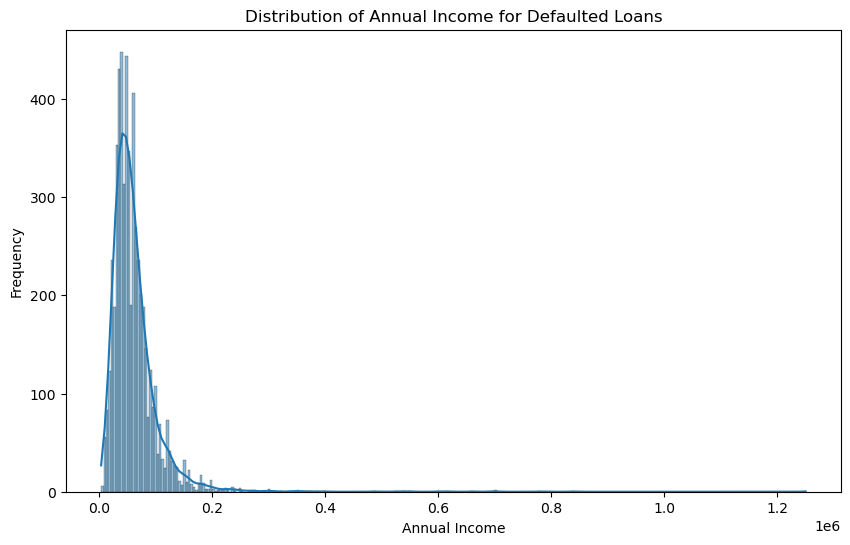

In [65]:

# Histogram/Density Plot
plt.figure(figsize=(10, 6))
sns.histplot(defaulted_loans['annual_inc'], kde=True)
plt.title('Distribution of Annual Income for Defaulted Loans')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.show()


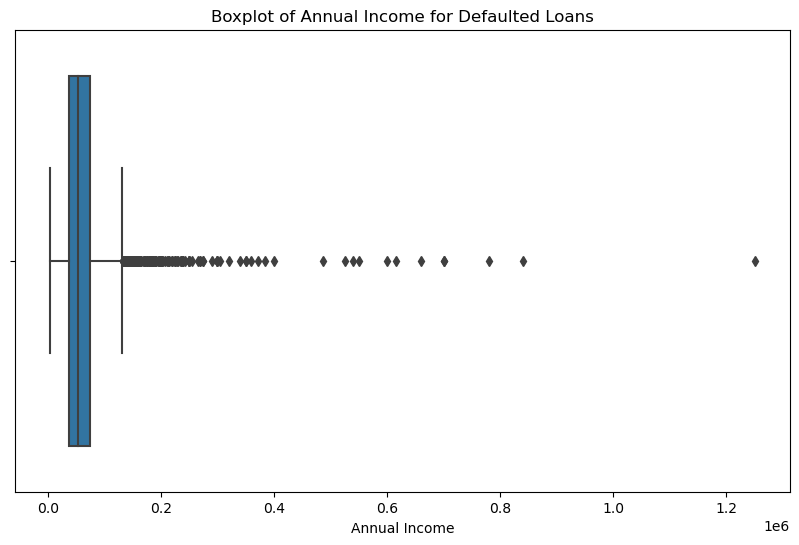

In [66]:

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=defaulted_loans['annual_inc'])
plt.title('Boxplot of Annual Income for Defaulted Loans')
plt.xlabel('Annual Income')
plt.show()
